In [52]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [77]:
from matplotlib import pyplot

In [53]:
final_train = pd.read_csv("train_processed.csv")
final_train.head(5)


,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,label
0,1,12,187,219,44147,3,3.5,1,2.20,4.81,129.35,0,23246,1,0,4,0,1,1,0
1,1,12,187,219,68914,2,3.0,1,2.20,4.44,100.89,0,23246,1,0,4,0,1,1,5
2,4,5,219,219,109185,4,4.5,1,3.18,6.08,323.00,1,12588,2,46,1,0,1,1,0
3,4,5,219,219,139893,2,3.0,1,1.61,5.25,129.00,0,12588,2,46,1,0,1,1,1
4,6,14,100,100,104251,3,4.0,1,1.95,0.00,145.00,0,21106,1,5,2,0,1,0,5


In [54]:
#selected_features = ['prop_brand_bool', 'prop_log_historical_price', 'promotion_flag',
#                     'srch_length_of_stay', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff',
#                     'histpricediff', 'histstardiff', 'pricediff', 'stardiff', 'reviewscorediff', 'locationscore1diff', 'locationscore2diff', 'pricechange', 'hotel_count', 'popularity_score', 'is219',
#                     'usd_diff', 'prop_starrating_monotonic', 'room_count_booking_window', 'people_stay_count', 'month']
#
#target_features = ['target']

X = final_train.drop("label", axis=1)
y = final_train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [55]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443246 entries, 0 to 443245
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   srch_id                      443246 non-null  int64  
 1   site_id                      443246 non-null  int64  
 2   visitor_location_country_id  443246 non-null  int64  
 3   prop_country_id              443246 non-null  int64  
 4   prop_id                      443246 non-null  int64  
 5   prop_starrating              443246 non-null  int64  
 6   prop_review_score            443246 non-null  float64
 7   prop_brand_bool              443246 non-null  int64  
 8   prop_location_score1         443246 non-null  float64
 9   prop_log_historical_price    443246 non-null  float64
 10  price_usd                    443246 non-null  float64
 11  promotion_flag               443246 non-null  int64  
 12  srch_destination_id          443246 non-null  int64  
 13 

In [56]:
final_train.replace([np.inf, -np.inf], np.nan, inplace=True)
final_train.fillna(0, inplace=True)

In [57]:
final_train.iloc[214695]

srch_id                        161400.00
site_id                             5.00
visitor_location_country_id       219.00
prop_country_id                   219.00
prop_id                         15121.00
prop_starrating                     3.00
prop_review_score                   4.00
prop_brand_bool                     1.00
prop_location_score1                1.61
prop_log_historical_price           0.00
price_usd                          74.00
promotion_flag                      0.00
srch_destination_id             20995.00
srch_length_of_stay                 3.00
srch_booking_window                 0.00
srch_adults_count                   2.00
srch_children_count                 0.00
srch_room_count                     1.00
srch_saturday_night_bool            0.00
label                               0.00
Name: 214695, dtype: float64

In [58]:
X = final_train.drop("label", axis=1)
y = final_train['label']

In [59]:
!pip install pyyaml h5py

In [60]:
logreg = LogisticRegression(multi_class = "multinomial")
logreg.max_iter = 7600
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')


In [61]:
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')


In [63]:

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.500


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00014
Feature: 2, Score: 0.00073
Feature: 3, Score: 0.00087
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00001
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00005
Feature: 9, Score: 0.00006
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00004
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00004
Feature: 14, Score: 0.00033
Feature: 15, Score: 0.00003
Feature: 16, Score: -0.00001
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00000


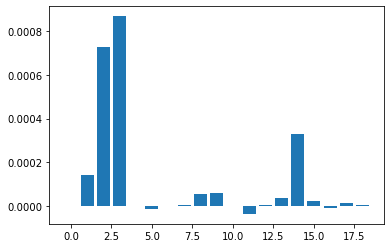

In [80]:
importance = logreg.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [64]:
final_test = pd.read_csv("test_processed.csv", sep = ',')

In [65]:
final_test.replace([np.inf, -np.inf], np.nan, inplace=True)
final_test.fillna(0, inplace=True)

In [66]:
final_test.head(20)

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool
0,1,24,216,219,3180,3,4.5,1,2.94,5.03,119.00,0,19222,1,10,2,0,1,0
1,1,24,216,219,5543,3,4.5,1,2.64,4.93,118.00,0,19222,1,10,2,0,1,0
2,1,24,216,219,14142,2,3.5,1,2.71,4.16,49.00,0,19222,1,10,2,0,1,0
3,1,24,216,219,22393,3,4.5,1,2.40,5.03,143.00,0,19222,1,10,2,0,1,0
4,1,24,216,219,24194,3,4.5,1,2.94,4.72,79.00,0,19222,1,10,2,0,1,0
5,1,24,216,219,28181,3,4.5,1,2.30,4.68,84.15,0,19222,1,10,2,0,1,0
6,1,24,216,219,34263,3,4.5,1,3.09,4.63,79.00,0,19222,1,10,2,0,1,0
7,1,24,216,219,37567,2,4.5,0,2.83,4.21,52.40,1,19222,1,10,2,0,1,0
8,1,24,216,219,50162,2,3.5,1,2.20,4.36,49.99,1,19222,1,10,2,0,1,0
9,1,24,216,219,54937,3,4.0,1,2.08,4.75,83.30,1,19222,1,10,2,0,1,0


In [67]:
logreg.max_iter = 10000
logreg.fit(X, y)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [68]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443246 entries, 0 to 443245
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   srch_id                      443246 non-null  int64  
 1   site_id                      443246 non-null  int64  
 2   visitor_location_country_id  443246 non-null  int64  
 3   prop_country_id              443246 non-null  int64  
 4   prop_id                      443246 non-null  int64  
 5   prop_starrating              443246 non-null  int64  
 6   prop_review_score            443246 non-null  float64
 7   prop_brand_bool              443246 non-null  int64  
 8   prop_location_score1         443246 non-null  float64
 9   prop_log_historical_price    443246 non-null  float64
 10  price_usd                    443246 non-null  float64
 11  promotion_flag               443246 non-null  int64  
 12  srch_destination_id          443246 non-null  int64  
 13 

In [69]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959183 entries, 0 to 4959182
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   site_id                      int64  
 2   visitor_location_country_id  int64  
 3   prop_country_id              int64  
 4   prop_id                      int64  
 5   prop_starrating              int64  
 6   prop_review_score            float64
 7   prop_brand_bool              int64  
 8   prop_location_score1         float64
 9   prop_log_historical_price    float64
 10  price_usd                    float64
 11  promotion_flag               int64  
 12  srch_destination_id          int64  
 13  srch_length_of_stay          int64  
 14  srch_booking_window          int64  
 15  srch_adults_count            int64  
 16  srch_children_count          int64  
 17  srch_room_count              int64  
 18  srch_saturday_night_bool     int64  
dtype

In [70]:
selectedfeatures = ["srch_id", "site_id", "visitor_location_country_id", "prop_country_id", "prop_id", "prop_starrating", "prop_review_score", "prop_brand_bool", "prop_location_score1", "prop_log_historical_price", "price_usd", "promotion_flag", "srch_destination_id", "srch_length_of_stay", "srch_booking_window", "srch_adults_count", "srch_children_count", "srch_room_count", "srch_saturday_night_bool"]


In [71]:
final_test['label'] = logreg.predict(final_test[selectedfeatures])

In [72]:
final_test.sort_values(["srch_id","label"],ascending=[True,False], inplace=True)

In [73]:
submission = final_test[['srch_id','prop_id']]

In [74]:
submission.to_csv("C:/Users/joaqu/pythonProject/DMT2/submission_logre.csv",index=False)

In [75]:
submission.head(5)

,srch_id,prop_id
0,1,3180
1,1,5543
2,1,14142
3,1,22393
4,1,24194
